Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generating Linear Data with some Noise added

In [2]:
n=500
x=np.linspace(0,1,n)
y=15*x+5+np.random.randn(len(x))

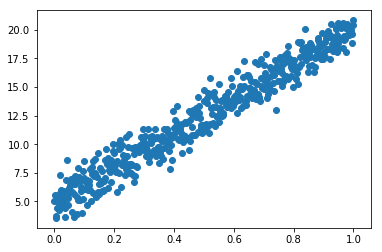

In [3]:
plt.scatter(x,y)

Funtion to predict regression output

In [4]:
def predict(theta0,theta,xi):
    return theta0+theta*xi

Mean Squared Error Function

In [5]:
def sq_error(theta0,theta,xi,yi):
    return sum((yi-predict(theta0,theta,xi))**2)/n

Fit funtion to tune the regression parameters

In [6]:
def fit(x,y,alpha,epsilon):
    t0i=0
    ti=0
    i=0
    error=1
    loss=sq_error(t0i,ti,x,y)
    losslist=[]
    iterlist=[]
    while error>epsilon:
        ycap=t0i+ti*x
        gt0,gt=gradients(t0i,ti,x,y)
        theta0=t0i-alpha*gt0
        theta=ti-alpha*gt
        t0i=theta0
        ti=theta
        loss_final=sq_error(theta0,theta,x,y)
        error=abs(loss_final-loss)
        losslist.append(loss)
        iterlist.append(i)
        loss=loss_final
        i+=1
    plt.plot(iterlist,losslist)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    return theta0,theta

Funtion to calculate Gradients of the loss

In [7]:
def gradients(theta0,theta,xi,yi):
    dj0=theta0+theta*xi-yi
    dj1=dj0@xi.T
    return [sum(dj0)/n,
            np.sum(dj1)/n]

Funtion to plot a line from slope and intercept

In [8]:
def line(slope, intercept):
    axes=plt.gca()
    x=np.array(axes.get_xlim())
    y=intercept+slope*x
    plt.plot(x, y,'--r',linewidth=2)

Splitting training and testing data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Fitting our model

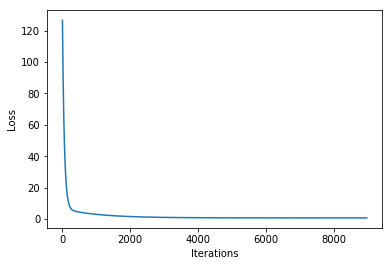

In [11]:
alpha=0.01
epsilon=0.000001
t0,t=fit(x_train,y_train,alpha,epsilon)

Training error and plot

In [12]:
sq_error(t0,t,x_train,y_train)

0.7674623688787231

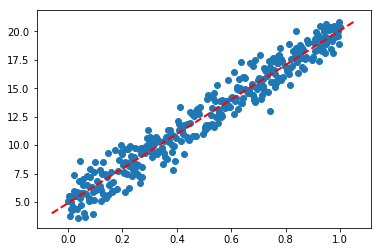

In [13]:
plt.scatter(x_train,y_train)
line(t,t0)
plt.show()

Predicting the result

In [14]:
result=predict(t0,t,x_test)

Testing error and graph

In [15]:
sq_error(t0,t,x_test,y_test)

0.2935205005037275

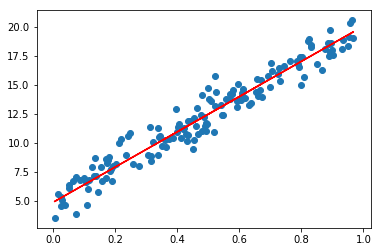

In [16]:
plt.scatter(x_test,y_test)
plt.plot(x_test,result,'r')
plt.show()